In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.preprocessing import image

# classes_bin = ['NG', 'OK']
# model_bin = tf.keras.models.load_model('dai-v3.h5')

classes_multi = ['NGFL', 'NGSC' ,'NGSH', 'OK']
model_multi = tf.keras.models.load_model('dai-v4.h5')

Sigmoid result: [0.00952613 0.9606135  0.02984315 0.42972788] - Prediction: NGSC - Confidence: 96.061 %


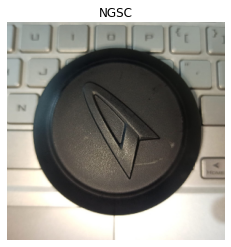

In [6]:
img = image.load_img('workspace/images/testing.jpeg', target_size=(299, 299)) #type nya PIL.image
x = image.img_to_array(img) #ubah ke np.ndarray, or just use cv.imread() udah langsung np.ndarray (shape dan dim udah sama juga)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# FOR BINARY CLASSIFICATION
# pred_bin = model_bin.predict(images)
# sigmoid_bin = tf.nn.sigmoid(pred_bin[0]).numpy()
# sigmoid_bin01 = tf.where(sigmoid_bin < 0.5, 0, 1)
# if sigmoid_bin01 == 0:
#   label_bin = classes_bin[0]
# else:
#   label_bin = classes_bin[1]

# FOR MULTI CLASS CLASSIFICATION
pred_multi = model_multi.predict(images)
sigmoid_multi = tf.nn.sigmoid(pred_multi[0]).numpy()
for i in range(len(sigmoid_multi)):
    if sigmoid_multi[i] == max(sigmoid_multi):
        sigmoid_multi_max = sigmoid_multi[i]
        label_multi = classes_multi[i]
        class_number = i
        break

print(f'Sigmoid result: {sigmoid_multi} - Prediction: {label_multi} - Confidence: {round(sigmoid_multi_max*100, 3)} %')
# print(f'Sigmoid result: {sigmoid_bin} - Prediction: {label_bin}')

plt.figure()
plt.axis('off')
plt.title(label_multi)
result = plt.imshow(img)
plt.show()